In [1]:
import os

from bambi import Model
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

from analysis_functions import make_sure_path_exists
from plotting_functions import plot_correlation, cm2inch, add_regression_line

In [2]:
make_sure_path_exists('results/descriptives')
make_sure_path_exists('results/figures')

In [3]:
np.random.seed(16) # from random.org

# Load subject summary

In [4]:
multiplicative_odd_summary = pd.read_csv(os.path.join('results', 'predictions', 'out_of_sample', 'descriptives',
                                                      'subject_summary_multiplicative_oos.csv'),
                                         index_col=[0], header=[0, 1])
multiplicative_odd_summary.head()

rt                                                   \
                mean          std    min      max         se       q1   
subject                                                                 
0        1434.192000   538.289384  419.0   4090.0  11.350659  1058.00   
1        1443.249796   759.370108  259.0   5570.0  15.344725   915.00   
2        4486.572000  2976.300751  539.0  33182.0  59.537924  2416.75   
3        1966.197273   505.283550  903.0   4722.0  10.775131  1648.00   
4        1650.926400   719.954680  514.0   5851.0  14.401974  1190.00   

                          best_chosen      gaze_influence             dataset  
              q3      iqr        mean Unnamed: 10_level_1 Unnamed: 11_level_1  
subject                                                                        
0        1681.00   623.00    0.904889            0.077317        krajbich2010  
1        1754.75   839.75    0.640000            0.216067        krajbich2010  
2        5643.50  3226.75    0.836000            0.007773        krajbich2010  
3        2185.00   537.00    0.656818            0.128273        krajbich2010  
4        1913.00   723.00    0.744800            0.387967        krajbich2010

# Run mixed effects regression, accounting for datasets
## Does GLAM qualitatively recover empirically observed behavioral associations?

In [5]:
n_samples = 20000

In [6]:
# create dataframe for mfx models
df = pd.DataFrame(dict(subject=multiplicative_odd_summary.index, # index equals subject ID
                       dataset=multiplicative_odd_summary['dataset']['Unnamed: 11_level_1'],
                       mean_rt=multiplicative_odd_summary['rt']['mean'],
                       best_chosen=100 * multiplicative_odd_summary['best_chosen']['mean'],
                       gaze_influence=100 * multiplicative_odd_summary['gaze_influence']['Unnamed: 10_level_1']))

In [7]:
result_path = os.path.join('results', 'mixed_effects_models', 'si3_predicted_individual_differences_a_best_chosen.csv')
if not os.path.isfile(result_path):
    m = Model(df)
    a_best_chosen_fit = m.fit('best_chosen ~ mean_rt',
                              random=['mean_rt|dataset'],
                              categorical=['dataset'],
                              samples=n_samples,
                              chains=2)
    a_summary = a_best_chosen_fit.summary(ranefs=True)
    a_summary.to_csv(result_path)
else:
    print('Previous results loaded from "{}"...'.format(result_path))
    a_summary = pd.read_csv(result_path, index_col=0)
a_summary

Previous results loaded from "results/mixed_effects_models/si3_predicted_individual_differences_a_best_chosen.csv"...


,mean,sd,hpd0.95_lower,hpd0.95_upper,effective_n,gelman_rubin
1|dataset[folke2016],-3.850017,6.037433,-1.691205e+01,7.211606,13357,1.000146
1|dataset[krajbich2010],2.607832,5.068189,-7.289657e+00,13.346603,9021,1.000533
1|dataset[krajbich2011],-3.795367,4.978577,-1.458692e+01,5.549114,8718,1.000163
1|dataset[tavares2017],5.405715,5.500875,-4.156288e+00,16.980059,9761,1.000823
1|dataset_sd,7.412221,4.592130,7.640197e-04,16.027238,10633,1.000276
Intercept,78.914418,4.894836,6.890519e+01,88.872204,6775,1.000607
best_chosen_sd,10.158341,0.690398,8.840166e+00,11.530310,31408,1.000099
mean_rt,-0.001133,0.001590,-4.126580e-03,0.002291,9556,0.999978
mean_rt|dataset[folke2016],-0.001203,0.001663,-4.966469e-03,0.001598,9537,0.999980
mean_rt|dataset[krajbich2010],0.000909,0.001677,-2.068267e-03,0.004774,13639,0.999978


In [8]:
result_path = os.path.join('results', 'mixed_effects_models', 'si3_predicted_individual_differences_b_mean_rt.csv')
if not os.path.isfile(result_path):
    m = Model(df)
    b_mean_rt_fit = m.fit('mean_rt ~ gaze_influence',
                          random=['gaze_influence|dataset'],
                          categorical=['dataset'],
                          samples=n_samples,
                          chains=2)
    b_summary = b_mean_rt_fit.summary(ranefs=True)
    b_summary.to_csv(result_path)
else:
    print('Previous results loaded from "{}"...'.format(result_path))
    b_summary = pd.read_csv(result_path, index_col=0)
b_summary

Previous results loaded from "results/mixed_effects_models/si3_predicted_individual_differences_b_mean_rt.csv"...


,mean,sd,hpd0.95_lower,hpd0.95_upper,effective_n,gelman_rubin
1|dataset[folke2016],2282.926492,911.790639,507.065636,4183.234992,151,1.006803
1|dataset[krajbich2010],-563.426890,854.904519,-2281.350344,1339.570610,118,1.012702
1|dataset[krajbich2011],-535.514348,855.098489,-2179.560165,1396.168825,123,1.011203
1|dataset[tavares2017],-915.237116,864.180156,-2714.940752,894.326109,129,1.012524
1|dataset_sd,1639.233157,592.504242,668.523260,2845.189521,874,1.000054
Intercept,2890.695623,841.690873,842.609265,4429.605635,110,1.013987
gaze_influence,-1.270321,16.280947,-34.109216,32.460239,272,1.005470
gaze_influence|dataset[folke2016],4.429943,17.044439,-35.506268,40.701000,650,1.000895
gaze_influence|dataset[krajbich2010],-10.576384,17.145366,-49.311211,19.545357,345,1.004976
gaze_influence|dataset[krajbich2011],3.129911,16.432574,-30.801500,41.049461,338,1.002944


In [9]:
result_path = os.path.join('results', 'mixed_effects_models', 'si3_predicted_individual_differences_c_gaze_influence.csv')
if not os.path.isfile(result_path):
    m = Model(df)
    c_gaze_influence_fit = m.fit('best_chosen ~ gaze_influence', 
                                 random=['gaze_influence|dataset'],
                                 categorical=['dataset'],
                                 samples=n_samples,
                                 chains=2)
    c_summary = c_gaze_influence_fit.summary(ranefs=True)
    c_summary.to_csv(result_path)
else:
    print('Previous results loaded from "{}"...'.format(result_path))
    c_summary = pd.read_csv(result_path, index_col=0)
c_summary

Previous results loaded from "results/mixed_effects_models/si3_predicted_individual_differences_c_gaze_influence.csv"...


,mean,sd,hpd0.95_lower,hpd0.95_upper,effective_n,gelman_rubin
1|dataset[folke2016],-2.395006,4.096390,-11.389149,5.063947,10266,0.999993
1|dataset[krajbich2010],1.641229,3.510146,-4.876838,9.567186,7989,0.999978
1|dataset[krajbich2011],-1.747444,3.519306,-9.414014,5.017206,9191,0.999977
1|dataset[tavares2017],3.687209,4.364017,-3.281590,13.150224,8226,0.999995
1|dataset_sd,4.970288,3.613081,0.000475,11.978790,7168,1.000008
Intercept,84.844101,3.356356,77.708689,91.528262,7986,0.999983
best_chosen_sd,7.906527,0.533079,6.904450,8.979606,32225,0.999998
gaze_influence,-0.419106,0.158849,-0.738456,-0.078450,5927,1.000756
gaze_influence|dataset[folke2016],-0.215301,0.184679,-0.606061,0.110609,7279,1.000420
gaze_influence|dataset[krajbich2010],0.080187,0.162480,-0.259966,0.417209,6196,1.000744


In [10]:
# we also have to estimate gaze-influence ~ P(best chosen) for regression line in Figure 2:
result_path = os.path.join('results', 'mixed_effects_models', 'si3_predicted_individual_differences_c_gaze_influence_plotting.csv')
if not os.path.isfile(result_path):
    m = Model(df)
    c_gaze_influence_plotting_fit = m.fit('gaze_influence ~ best_chosen', 
                                 random=['best_chosen|dataset'],
                                 categorical=['dataset'],
                                 samples=n_samples,
                                 chains=2)
    c_summary_plotting = c_gaze_influence_plotting_fit.summary(ranefs=True)
    c_summary_plotting.to_csv(result_path)
else:
    print('Previous results loaded from "{}"...'.format(result_path))
    c_summary_plotting = pd.read_csv(result_path, index_col=0)

Previous results loaded from "results/mixed_effects_models/si3_predicted_individual_differences_c_gaze_influence_plotting.csv"...


# Supplementary Figrue 3 (reproduces Fig. 2 of the main text)

In [11]:
def figure_2(subject_summary, n_bins=20, figsize=cm2inch(18, 10)):
    
    fig = plt.figure(figsize=figsize)

    ax00 = plt.subplot2grid((11, 3), (0, 0))
    ax10 = plt.subplot2grid((11, 3), (1, 0))
    ax20 = plt.subplot2grid((11, 3), (2, 0))
    ax30 = plt.subplot2grid((11, 3), (3, 0))
    ax40 = plt.subplot2grid((11, 3), (5, 0), rowspan=6)
    axs0 = np.array([ax00, ax10, ax20, ax30, ax40])

    ax01 = plt.subplot2grid((11, 3), (0, 1))
    ax11 = plt.subplot2grid((11, 3), (1, 1))
    ax21 = plt.subplot2grid((11, 3), (2, 1))
    ax31 = plt.subplot2grid((11, 3), (3, 1))
    ax41 = plt.subplot2grid((11, 3), (5, 1), rowspan=6)
    axs1 = np.array([ax01, ax11, ax21, ax31, ax41])

    ax02 = plt.subplot2grid((11, 3), (0, 2))
    ax12 = plt.subplot2grid((11, 3), (1, 2))
    ax22 = plt.subplot2grid((11, 3), (2, 2))
    ax32 = plt.subplot2grid((11, 3), (3, 2))
    ax42 = plt.subplot2grid((11, 3), (5, 2), rowspan=6)
    axs2 = np.array([ax02, ax12, ax22, ax32, ax42])

    datasets = ['krajbich2010', 'krajbich2011', 'folke2016', 'tavares2017']

    # Correlation plots
    for d, (dataset, marker, markercolor) in enumerate(zip(datasets, ['+', '+', '+', '+'], ['C0', 'C1', 'C2', 'C3'])):
        dataset_summary = subject_summary[subject_summary['dataset']['Unnamed: 11_level_1'] == dataset].reset_index(drop=True)
        plot_correlation(dataset_summary['rt']['mean'],
                         dataset_summary['best_chosen']['mean'],
                         marker=marker,
                         markercolor=markercolor,
                         regression=False,
                         xlabel='Mean RT (ms)',
                         ylabel='P(choose best)',
                         xlim=(0, 8500),
                         xticks=np.arange(0, 9000, 2000),
                         ylim=(0.20, 1.0),
                         yticks=np.arange(0.4, 1.1, 0.2),
                         ax=ax40)

        plot_correlation(dataset_summary['gaze_influence']['Unnamed: 10_level_1'],
                         dataset_summary['rt']['mean'],
                         marker=marker,
                         markercolor=markercolor,
                         regression=False,
                         ylabel='Mean RT (ms)',
                         xlabel='Gaze influence\non P(choice | value)',
                         ylim=(0, 8500),
                         yticks=np.arange(0, 9000, 2000),
                         xlim=(-0.25, 0.85),
                         xticks=np.arange(-0.2, 0.9, 0.2),
                         ax=ax41)
        # fix xticks
        ax41.set_xticks(np.round(np.arange(-0.2, 0.9, 0.2), 1))
        ax41.set_xticklabels(np.round(np.arange(-0.2, 0.9, 0.2), 1))
        
        plot_correlation(dataset_summary['best_chosen']['mean'],
                         dataset_summary['gaze_influence'],
                         marker=marker,
                         markercolor=markercolor,
                         regression=False,
                             ylabel='Gaze influence\non P(choice | value)',
                         xlabel='P(choose best)',
                         ylim=(-0.25, 0.85),
                         yticks=np.round(np.arange(-0.2, 0.9, 0.2), 1),
                         xlim=(0.2, 1),
                         xticks=np.round(np.arange(0.4, 1.1, 0.2), 1),
                         ax=ax42)
        # fix yticks
        ax42.set_yticks(np.round(np.arange(-0.2, 0.9, 0.2), 1))
        ax42.set_yticklabels(np.round(np.arange(-0.2, 0.9, 0.2), 1))

        # Marginal histograms
        axs0[d].hist(dataset_summary['rt']['mean'],
                     bins=np.linspace(0, 8500, n_bins + 1),
                     color=markercolor)

        axs1[d].hist(dataset_summary['gaze_influence']['Unnamed: 10_level_1'],
                     bins=np.linspace(-0.2, 0.8, n_bins + 1),
                     color=markercolor)

        axs2[d].hist(dataset_summary['best_chosen']['mean'],
                     bins=np.linspace(0.3, 1, n_bins + 1),
                     color=markercolor)

        for axs in [axs0, axs1, axs2]:
            axs[d].set_xlim(axs[-1].get_xlim())

    patches = [mpatches.Rectangle((0, 0), 0.5, 1, fc="C{}".format(i))
               for i in range(len(datasets))]

    ax40.legend(patches,
                ['Krajbich 2010', 'Krajbich 2011', 'Folke 2016', 'Tavares 2017'],
                ncol=2,
                loc='lower left',
                handlelength=1, handleheight=1,
                fontsize=6, columnspacing=1,
                frameon=False)

    # Labels
    for label, ax in zip(list('abc'), [ax00, ax01, ax02]):
        ax.text(-0.35, 1.15, label, transform=ax.transAxes,
                fontsize=7, fontweight='bold', va='top')
    for label, ax in zip(list('def'), [ax40, ax41, ax42]):
        ax.text(-0.35, 1.05, label, transform=ax.transAxes,
                fontsize=7, fontweight='bold', va='top') 
        
    # Fine-tune marginal histograms
    for ax in np.array([ax00, ax10, ax20, ax30,
                        ax01, ax11, ax21, ax31,
                        ax02, ax12, ax22, ax32]):
        ax.set_xticks([])
        ax.set_ylim([0,10])
        ax.set_yticks([0,10])
        ax.set_yticklabels([0,10], fontsize=6)
    ax20.set_ylabel('          Frequency', fontsize=6)
    ax21.set_ylabel('          Frequency', fontsize=6)
    ax22.set_ylabel('          Frequency', fontsize=6)
    for ax in [ax00, ax10, ax20, ax30]:
        ax.set_xticks(np.arange(0, 9000, 2000))
        ax.set_xticklabels([])
    ax30.set_xticklabels(np.arange(0, 9000, 2000).astype(np.int), fontsize=6)
    ax30.set_xlabel('Mean RT (ms)', fontsize=6)
    for ax in [ax01, ax11, ax21, ax31]:
        ax.set_xticks(np.arange(-0.2, 0.9, 0.2))
        ax.set_xticklabels([])
    ax31.set_xticklabels(np.round(np.arange(-0.2, 0.9, 0.2), 1), fontsize=6)
    ax31.set_xlabel('Gaze Influence\non P(choice | value)', fontsize=6)
    for ax in [ax02, ax12, ax22, ax32]:
        ax.set_xticks(np.arange(0.4, 1.1, 0.2))
        ax.set_xticklabels([])
    ax32.set_xticklabels(np.round(np.arange(0.4, 1.1, 0.2), 1), fontsize=6)
    ax32.set_xlabel('P(choose best)', fontsize=6)
    
    fig.subplots_adjust(wspace=0.5, hspace=1.05)
    
    return fig, ax40, ax41, ax42

# Make Figure SI 3

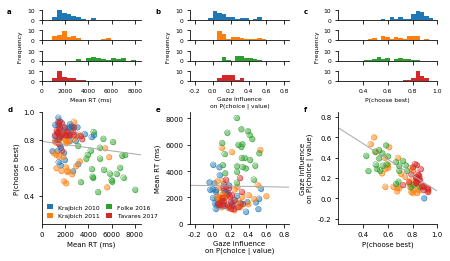

In [12]:
fig, axa, axb, axc = figure_2(subject_summary=multiplicative_odd_summary)

add_regression_line(axa, a_summary.loc['Intercept', 'mean'] / 100, a_summary.loc['mean_rt', 'mean'] / 100, color='darkgray', linewidth=1)
add_regression_line(axb, b_summary.loc['Intercept', 'mean'], b_summary.loc['gaze_influence', 'mean'] * 100, color='darkgray', linewidth=1)
add_regression_line(axc, c_summary.loc['Intercept', 'mean'] / 100, c_summary_plotting.loc['best_chosen', 'mean'], color='darkgray', linewidth=1)

plt.savefig('results/figures/si_figure_3_predicted_individual_differences.png', dpi=330, bbox_inches='tight')
plt.savefig('results/figures/si_figure_3_predicted_individual_differences.pdf', dpi=330, bbox_inches='tight')

plt.show()